## Web Scraping con Regular Expressions

- requests
- headers
- status codes
- BeautifulSoup
- sitemap

Las Regular Expressions son una forma muy flexible de realizar búsquedas dentro de textos, por lo que suele ser muy útil para extraer información de páginas web. 

#### Ejemplo 1:
    Usamos regex para extraer los títulos del diario La Prensa.


In [1]:
#Importamos las librerias necesarias

import requests
import re

In [3]:
url = 'http://www.laprensa.com.ar/'

head = {'user-agent': 'Mozilla/5.0 (X11; Linux x86_64) AppleWebKit/537.36 (KHTML, like Gecko) '
           'Chrome/59.0.3071.115 Safari/537.36'}

resp = requests.get(url, headers = head)

In [4]:
#Vemos el código de estado
resp.status_code

200

In [5]:
#Vemos los headers que enviamos
resp.request.headers

{'user-agent': 'Mozilla/5.0 (X11; Linux x86_64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/59.0.3071.115 Safari/537.36', 'Accept-Encoding': 'gzip, deflate', 'Accept': '*/*', 'Connection': 'keep-alive'}

### Los que nos interesan particularmente son resp.text y resp.content, que guardan el contenido de la página como string o como bytes respectivamente 

Para utilizar Regex en Python, usamos el módulo re. Las siguientes funciones nos proporcionan la mayor parte de la funcionalidad necesaria:

    - re.findall(pattern, string) 
    Busca dentro de string utilizando pattern, devolviendo una lista con todos los resultados.
    - re.search(pattern, string)
    Busca la primera coincidencia con pattern dentro de string.
    - re.sub(pattern, replace, string)
    Reemplaza lo que coincida con pattern por replace, dentro de string.

In [5]:
#Usamos el navegador para identificar la estructura de los datos que queremos extraer y creamos el patrón de búsqueda
pattern = 'class="title".+?>(.+?)<'

In [6]:
#Usamos findall para encontrar todas las coincidencias
titles = [m for m in re.findall(pattern, resp.text)]

In [7]:
titles

['El perito de la familia Maldonado dijo que "puede no haber resultados hoy" ',
 'Unos 20 peritos trabajan en la autopsia del cuerpo hallado en el rio Chubut',
 'Los secretos del fertirriego',
 'Los europeos consideran nuestra carne como la mejor del mundo',
 'Fuerte transformación en el mercado de alquileres',
 '"Leo teorías sobre si pueden  existir sociedades sin Estado"',
 'La ciencia de correr maratones',
 'Metódico, prolijo y personal',
 'Volver a la belleza en el siglo XXI',
 'Aquel bochornoso verano de 1989',
 'Magia y misterio en la vieja Praga',
 '"Lo que sí se puede lograr es indigencia 0"',
 'Crece el emprendedurismo femenino',
 'La Justicia estableció que Gils Carbó puede ser desplazada sin juicio político',
 'Sampaoli dio a conocer una lista para el amistoso ante Rusia',
 'Comenzó la veda electoral con prohibiciones que rigen hasta el final del comicio',
 'Murió a los 81 años el actor Federico Luppi ',
 'Elecciones 2017: consultá el padrón electoral',
 'Militantes sociales

### Ejercicio 2: 

Descargamos imagenes de Google Images, y las mostramos.

In [8]:
#Vamos a necesitar lo siguiente
import matplotlib.pyplot as plt
import codecs
from PIL import Image
from io import BytesIO

In [9]:
query = 'Data+Science'

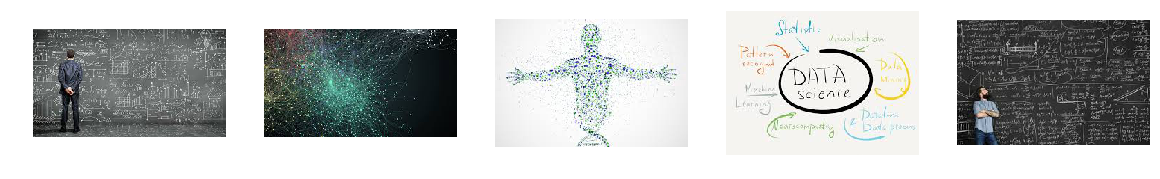

In [10]:
#La query se inserta en la URL

url = 'https://www.google.com.ar/search?q={0}&source=lnms&tbm=isch'.format(query)

search = requests.get(url, headers = head)

imgs = re.findall(b'base64,(.+?)[)"]', search.content)

q = 5

fig = plt.figure(figsize = (20,20))

for i in range(q):

    a = fig.add_subplot(1,q,i+1)
    img_bs64 = imgs[6 +i]
    img_by = codecs.decode(img_bs64, 'base64')
    buf = BytesIO(img_by)
    img = Image.open(buf)
    plt.imshow(img)
    plt.axis('off')
    
    #Si quisieramos guardarlas
    
    with open(filename + '.png', 'w') as out:
        out.write(img_by)
    
plt.show()

### Requests

In [36]:
import os
import re
import requests

In [89]:
url = 'https://www.udacity.com/course/intro-to-descriptive-statistics--ud827'
headers = {'user-agent':'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36'
           ' (KHTML, like Gecko) Chrome/59.0.3071.115 Safari/537.36'}
response = requests.get(url, headers = headers)

In [92]:
response.request.headers

{'Accept-Encoding': 'gzip, deflate', 'user-agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/59.0.3071.115 Safari/537.36', 'Connection': 'keep-alive', 'Accept': '*/*'}

In [86]:
#Cómo imprimimos el diccionario más organizadamente?
response.headers

{'Transfer-Encoding': 'chunked', 'X-Frame-Options': 'SAMEORIGIN', 'X-Request-Id': '5429a058-5a5e-4df6-94ff-ebafd52ccbdb', 'Access-Control-Allow-Headers': 'X-Berlioz-Country', 'Access-Control-Expose-Headers': 'X-Berlioz-Country', 'X-XSS-Protection': '1; mode=block', 'Content-Encoding': 'gzip', 'Content-Type': 'text/html; charset=utf-8', 'Set-Cookie': '_www_session=Mld6eE5kU3N0Nm9xblI4R3MwbHNyQ0lmTU1qZkx5SDZBQWFOQ1NhaE9zdnllanFGNjIxd3VEY0ZlTzhQYWlBbGVHRy83bEJCWFJlMFhOVXVBV1hIY0k2blZSbGhlZ1JDOUwyTmxYU0FCQ0ZWRC94UXdNVCtTTEp4eE53QWFaMXQzSHdqeGM3cDJFSHdsZkJWVkZuYk5nPT0tLUVtRTVRbi8rUEk5bTVsQ1RoejFLMUE9PQ%3D%3D--49ec22f8a9cb1daba62db5d78f95576c753f4676; path=/; HttpOnly', 'Cache-Control': 'max-age=0, private, must-revalidate', 'X-Berlioz-Country': 'AR', 'ETag': 'W/"ac7a682eb9868d2395160aa3224766f6"', 'X-Runtime': '0.086168', 'Vary': 'Accept-Encoding', 'X-Content-Type-Options': 'nosniff'}

In [33]:
response.status_code

200

In [35]:
response.encoding
#response.text / response.content

'utf-8'

In [51]:
p = set([w for w in re.findall('<li>([\w ,]+?\.)<', str(response.content))])
p

{'Apply the concepts of probability and normalization to sample data sets.',
 'Compute proportions using standardized distributions.',
 'Create and interpret histograms, bar charts, and frequency plots.',
 'Explore data through the use of bar graphs, histograms, box plots, and other common visualizations.',
 'Identify outliers in data sets using the concept of the interquartile range.',
 'Introduction to several statistical study methods.',
 'Investigate distributions and understand a distributions properties.',
 'Learn the positives and negatives of each.',
 'Manipulate distributions to make probabilistic predictions on data.',
 'Quantify the spread of data using the range and standard deviation.',
 'Take your data and display it to the world.',
 'Use statistical research methods.'}

#### Usando regex y requests, extraigan los nombres de todas las obras de Bach del siguiente link y guardenlos en un .txt

In [1]:
url = 'https://es.wikipedia.org/wiki/Anexo:Composiciones_de_Johann_Sebastian_Bach'

## BeautifulSoup

<tag attribute="value">content</tag>

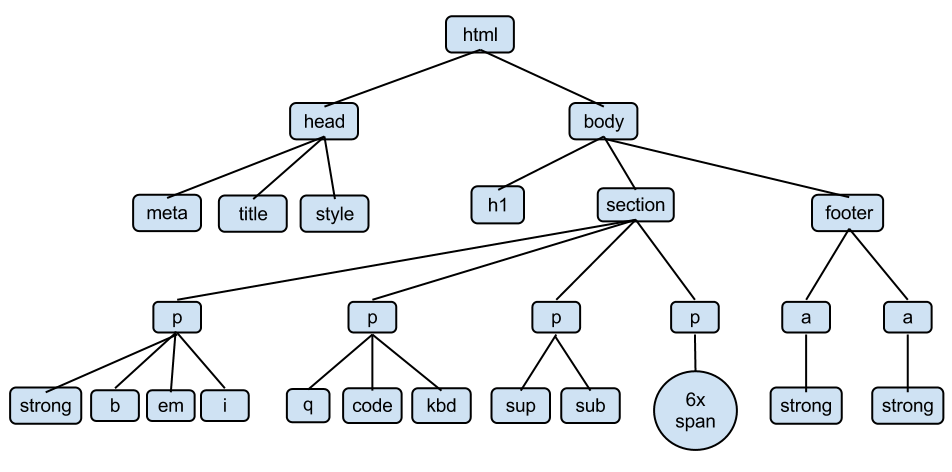

In [55]:
Image(r'E:\Data Science\Archivos\tree.png')

In [ ]:
Con BeautifulSoup, descargá las obras de Bach pero con sus respectivas categorías

### Usá BeautifulSoup para descargar los temas del siguiente curso (podés también usar regex)

In [61]:
url = 'https://www.udacity.com/course/intro-to-descriptive-statistics--ud827'

In [ ]:
url = 'http://ciudadseva.com/autor/julio-cortazar/cuentos/'

response = requests.get(url)

for s_url in re.findall('(http://ciudadseva.com/texto/.+?/)', response.text):
    cuento = requests.get(s_url)
    soup = BeautifulSoup(cuento.content, 'html.parser')
    for elem in soup.findAll("div", { "class" : "text-justify" })[:2]:
        cuento = elem.text
    with open (s_url.split('/')[-2] + '.txt', 'w') as out:
        out.write(cuento)

## Práctica

# Mercadolibre

Descargá información de algún producto de MercadoLibre. Fijate si podés entrar a los productos y recolectar algunos datos!

In [4]:
import requests
import re
url = 'https://listado.mercadolibre.com.ar/gibson'

In [10]:
res = requests.get(url)
re.findall(r'price__fraction.+?>(.+?)<', res.text)[:10]

['129.000',
 '115.000',
 '141.113',
 '276.000',
 '756.512',
 '322.000',
 '364.837',
 '163.626',
 '42.835',
 '74.592']

<font size = 3>Usá Requests para descargar los pdfs de esta página:

https://github.com/jdwittenauer/ipython-notebooks/tree/master/exercises/ML

In [1]:
import requests as rq
import re

In [1]:
def get_pdfs(url, path):
    content = rq.get(url).text
    pattern = r'\/(.+?pdf)'
    #cambio para descargar
    urls = [r'https://github.com/' + re.sub(r'/blob/', r'/raw/', url_) for url_ in re.findall(pattern, content)]
    for url_ in urls:
        pdf = rq.get(url_).content
        autor = url_.split('/')[3]
        nombrePdf = url_.split('/')[-1]
        file = '{} {}'.format(autor, nombrePdf)
        print(file)
        with open(file, 'wb') as out:
            out.write(pdf)
    return None

In [3]:
get_pdfs(url = r'https://github.com/jdwittenauer/ipython-notebooks/tree/master/exercises/ML', path = r'D:\Matias\PDFs Ciencia')

jdwittenauer ex1.pdf
jdwittenauer ex2.pdf
jdwittenauer ex3.pdf
jdwittenauer ex4.pdf
jdwittenauer ex5.pdf
jdwittenauer ex6.pdf
jdwittenauer ex7.pdf
jdwittenauer ex8.pdf


Otros:

'https://weworkremotely.com/categories/2-programming/jobs'

'https://www.ncbi.nlm.nih.gov/pubmed/?term=' + 

'https://people.eecs.berkeley.edu/~alig/papers/'

'https://listado.mercadolibre.com.ar/gibson'

pubmed